In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from catboost import CatBoostClassifier, Pool, cv
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import itertools

#import h2o
import h2o
from h2o.automl import H2OAutoML

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import pyecharts
pd.set_option('precision',5)#精度
pd.set_option('display.float_format', lambda x: '%.5f' % x)#不用科學記號
pd.options.display.max_rows = 200 #最多顯示200行

In [2]:
Data_Path = 'C:\\Users\justi\OneDrive\桌面\MyFuture\\'
df_19Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q1.csv',encoding='gbk')
df_19Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q2.csv',encoding='gbk')
df_19Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q3.csv',encoding='gbk')
df_19Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2019Q4.csv',encoding='gbk')
df_18Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q1.csv',encoding='gbk')
df_18Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q2.csv',encoding='gbk')
df_18Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q3.csv',encoding='gbk')
df_18Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2018Q4.csv',encoding='gbk')
df_17Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q1.csv',encoding='gbk')
df_17Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q2.csv',encoding='gbk')
df_17Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q3.csv',encoding='gbk')
df_17Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2017Q4.csv',encoding='gbk')
df_16Q1= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q1.csv',encoding='gbk')
df_16Q2= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q2.csv',encoding='gbk')
df_16Q3= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q3.csv',encoding='gbk')
df_16Q4= pd.read_csv(Data_Path + 'LoanStats_securev1_2016Q4.csv',encoding='gbk')
df_15= pd.read_csv(Data_Path + 'LoanStats_securev1_2015.csv',encoding='gbk')
df_14= pd.read_csv(Data_Path + 'LoanStats_securev1_2014.csv',encoding='gbk')
df_12_13= pd.read_csv(Data_Path + 'LoanStats_securev1_2012_2013.csv',encoding='gbk')
df = pd.concat([df_19Q1,
                df_19Q2,
                df_19Q3,
                df_19Q4,
                df_18Q1,
                df_18Q2,
                df_18Q3,
                df_18Q4,
                df_17Q1,
                df_17Q2,
                df_17Q3,
                df_17Q4,
                df_16Q1,
                df_16Q2,
                df_16Q3,
                df_16Q4,
                df_15,
                df_14,
                df_12_13
               ])

In [3]:
df = df[df.loan_status.isin(['Fully Paid','Charged Off'])]
df = df[df.home_ownership.isin(['MORTGAGE','RENT','OWN'])]

In [4]:
mis_feas = [i for i in df.columns if((df[i].isnull().sum())/df.shape[0]) > 0.4]
for fea in mis_feas:
    mis_rate = (df[fea].isnull().sum())/df.shape[0]
    print(fea,'\t',mis_rate)

df.drop(mis_feas,axis=1,inplace=True)

member_id 	 1.0
desc 	 0.9399665808316046
mths_since_last_delinq 	 0.5021257993868806
mths_since_last_record 	 0.8291927799196872
next_pymnt_d 	 1.0
mths_since_last_major_derog 	 0.7308471591533562
annual_inc_joint 	 0.9696371145261613
dti_joint 	 0.9696389773560606
verification_status_joint 	 0.9703145636662479
open_acc_6m 	 0.4949110591864525
open_act_il 	 0.49491043824315273
open_il_12m 	 0.49491043824315273
open_il_24m 	 0.49491043824315273
mths_since_rcnt_il 	 0.5091325235818742
total_bal_il 	 0.49491043824315273
il_util 	 0.5650329441467711
open_rv_12m 	 0.49491043824315273
open_rv_24m 	 0.49491043824315273
max_bal_bc 	 0.49491043824315273
all_util 	 0.49497191162983334
inq_fi 	 0.49491043824315273
total_cu_tl 	 0.4949110591864525
inq_last_12m 	 0.4949110591864525
mths_since_recent_bc_dlq 	 0.7581022234116737
mths_since_recent_revol_delinq 	 0.6579335131171168
revol_bal_joint 	 0.9754801909773213
sec_app_fico_range_low 	 0.9754795700340215
sec_app_fico_range_high 	 0.975479570034

In [5]:
#貸後資訊
ignored_cols = [ 
                'out_prncp',                 # 剩餘未償還本金金額
                'out_prncp_inv',             # 剩餘未償還本金佔總額的比例 
                'total_pymnt',               # 至今收到的已付額
                'total_pymnt_inv',           # 至今收到的款項，佔投資者資助總額的比例
                'total_rec_prncp',           # 至今收到的本金 
                'total_rec_int',             # 至今收到的利息
                'total_rec_late_fee',        # 至今為止收取的延滯金
                'recoveries',                # 過帳總回收費用
                'collection_recovery_fee',   # 郵寄回收費
                'last_pymnt_d',              # 上個月已收到付款
                'last_pymnt_amnt',           # 上一個收到的總付款金額
                'last_credit_pull_d',        # 一個月內最近一筆取消貸款的信貸
                'debt_settlement_flag',      # 標記已清帳的借款人是否正在與債務清算公司合作。
                'zip_code',
                'num_tl_120dpd_2m',
                'sub_grade',
                'grade',
                'acc_now_delinq',
                'tot_coll_amt',
                'delinq_amnt',
                'pct_tl_nvr_dlq',
                'percent_bc_gt_75',
                'tax_liens',
                'tot_coll_amt',
                'hardship_flag',
                'earliest_cr_line'
]
df = df.drop(columns=ignored_cols, axis = 1)

In [6]:
df = df.drop(columns=['id','url','policy_code'], axis = 1)

In [7]:
#刪除高度相關特徵
df.drop(['funded_amnt','funded_amnt_inv','installment','tot_cur_bal','num_sats','total_il_high_credit_limit'], axis=1, inplace=True)

In [8]:
#刪除LC預設風險特徵或其他不加入模型的特徵,主觀判斷!
df.drop(['emp_title','verification_status','pymnt_plan','title','addr_state','fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low','num_rev_tl_bal_gt_0','collections_12_mths_ex_med'], axis=1, inplace=True)

In [9]:
df.shape

(1610453, 47)

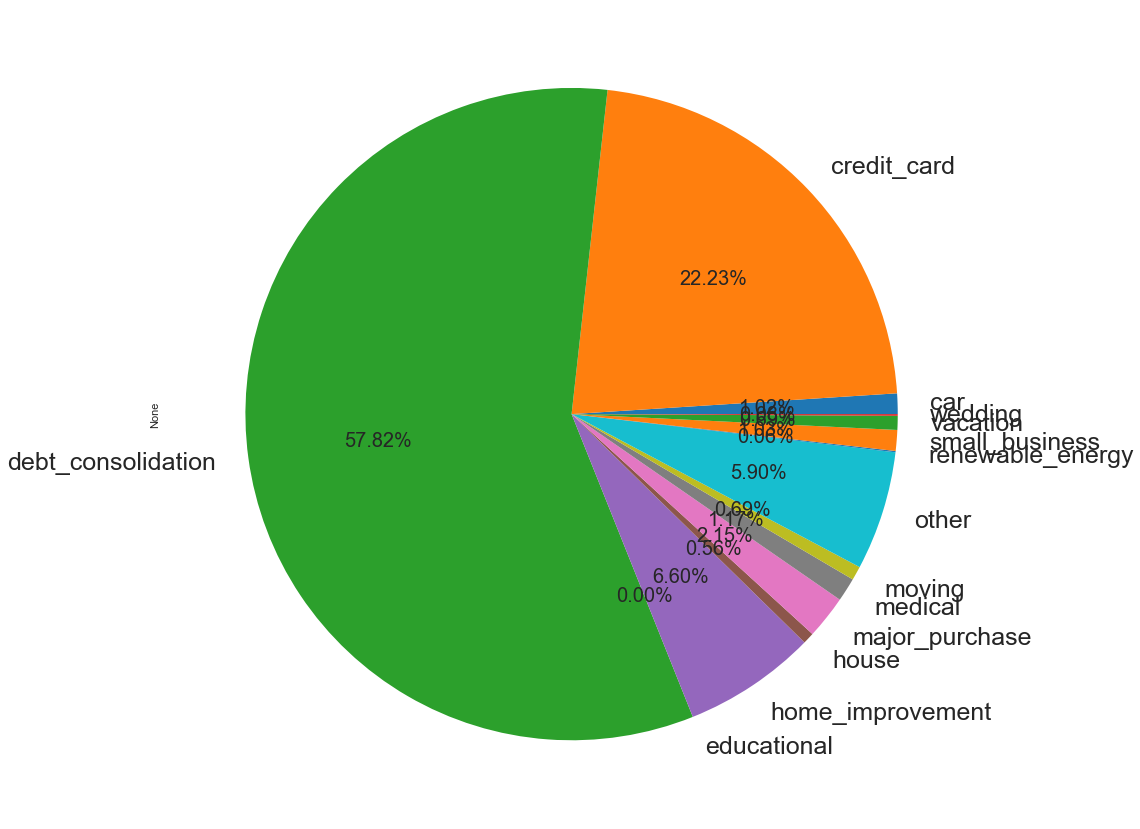

In [10]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=25) 
df.groupby('purpose').size().plot(kind='pie',autopct='%1.2f%%')

In [11]:
def plot_discrete(data,cols,col_target):
    cnt=len(cols)
    fig,ax=plt.subplots(cnt,2,figsize=(2*7,cnt*6))
    #變量取值分布
    for i in range(len(cols)):
        df=data[cols[i]].value_counts(dropna=False)
        df_pnt=100*df/df.sum()
        df.plot(kind='barh',ax=ax[i,0])
        axset=ax[i,0].set(title=cols[i]) #左上標題
        #圖註釋，例如：975—3.09%，表示某變量取值下樣本數975，占所有樣本總數和的比例3.09
        for j in range(len(df)):
            axtext=ax[i,0].text(df.iloc[j],j,'%s—%s%%'%(df.iloc[j],round(df_pnt.iloc[j],2)))
        #雙變量分布：目標變量按單個變量分組後，組內不同類別樣本占比
        df1=pd.crosstab(data[cols[i]],data[col_target],normalize='index',dropna=False)
        df1.plot(kind='barh',ax=ax[i,1],stacked=True,legend=False)
        ax_set=ax[i,1].set(title='%s vs loan_status'%cols[i]) #右上標題
        #圖註釋，例如：80%，20%，表示變量某取值下，樣本分為兩個不同類別(1和0)，分別占比80,20%，
        for k in range(len(df1)):
            ax_set=ax[i,1].text(df1.iloc[k,0],k,'%s%%'%round(100*df1.iloc[k,0],2),ha='right')
            ax_set=ax[i,1].text(1,k,'%s%%'%round(100*df1.iloc[k,1],2),ha='center')
    #自動調整子圖布局
    plt.tight_layout()

In [12]:
features = ['emp_length','home_ownership','purpose']

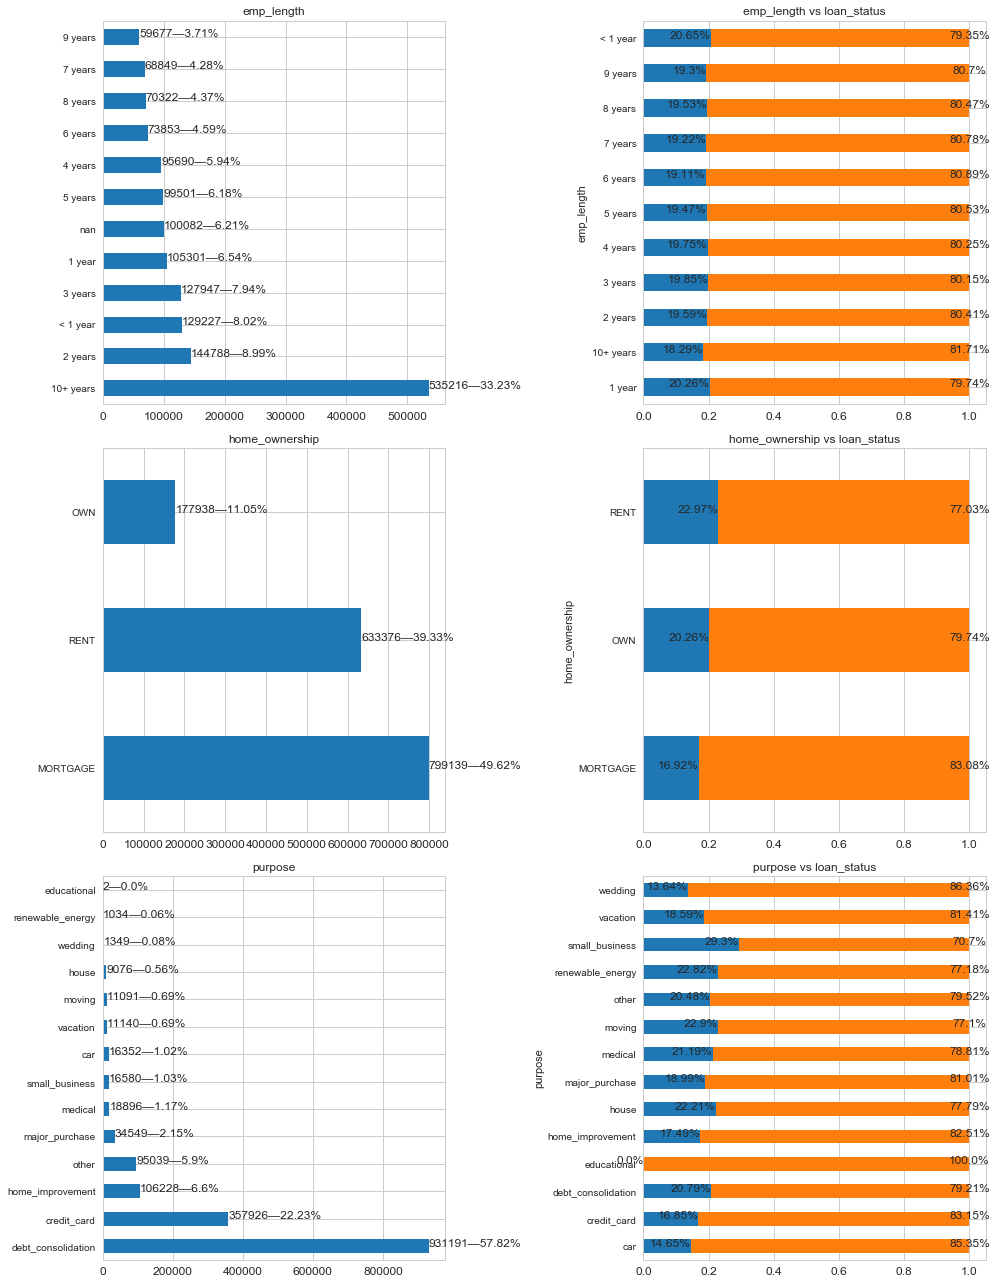

In [13]:
plt.rcParams['font.size'] = 12
plt.rc('xtick', labelsize=12) 
plot_discrete(df,features,'loan_status')

In [16]:
df.annual_inc = df.annual_inc.astype(float)

In [17]:
plt.rcParams['figure.figsize'] = (11,11)
def inc_class(num):
    if num <= 50000:
        return '<=50000'
    elif num <= 75000:
        return '50000-75000'
    elif num <= 100000:
        return '75000-100000'
    elif num <= 125000:
        return '100000-125000'
    elif num <= 150000:
        return '125000-150000'
    else:
        return '>150000'

df['inc_class']=df['annual_inc'].apply(inc_class)

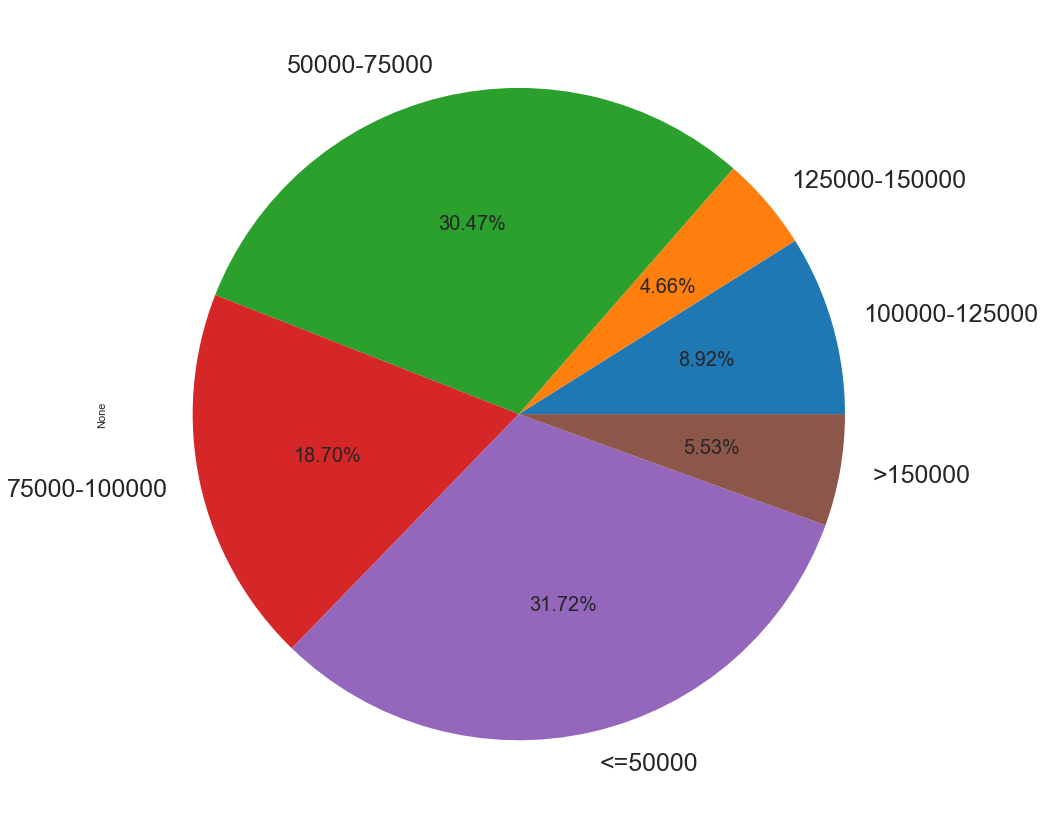

In [19]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=25) 
df.groupby('inc_class').size().plot(kind='pie',autopct='%1.2f%%')

In [24]:
df['int_rate'] = (df['int_rate'].str.replace('%','').astype('float'))

In [26]:
df['int_rate']

2        17.97000
22       20.00000
27       15.57000
30       17.19000
52       12.40000
           ...   
187991   16.77000
187992   15.27000
187993   15.96000
187994   16.29000
187995   15.27000
Name: int_rate, Length: 1610453, dtype: float64

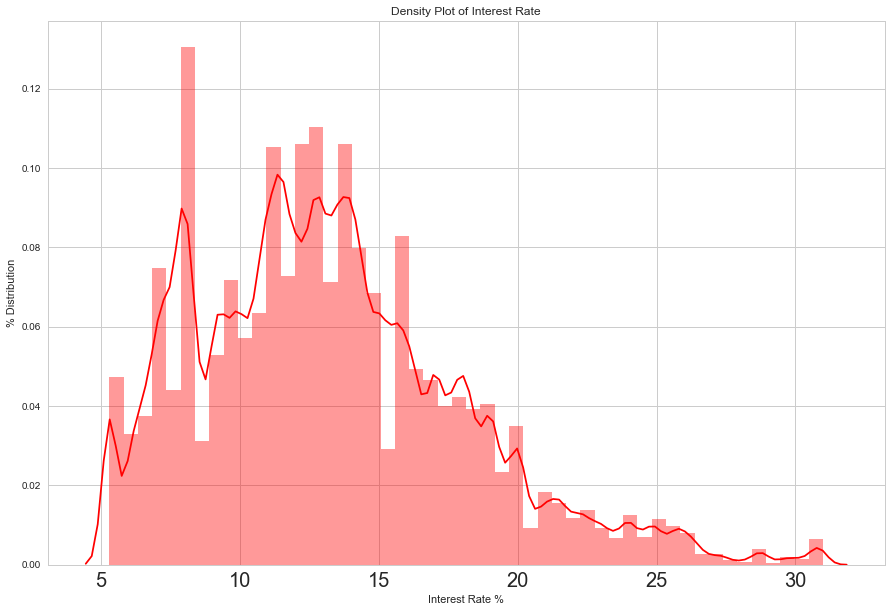

In [59]:
plt.rcParams['figure.figsize'] = (15,10)
ax=sns.distplot(df.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

plt.legend()

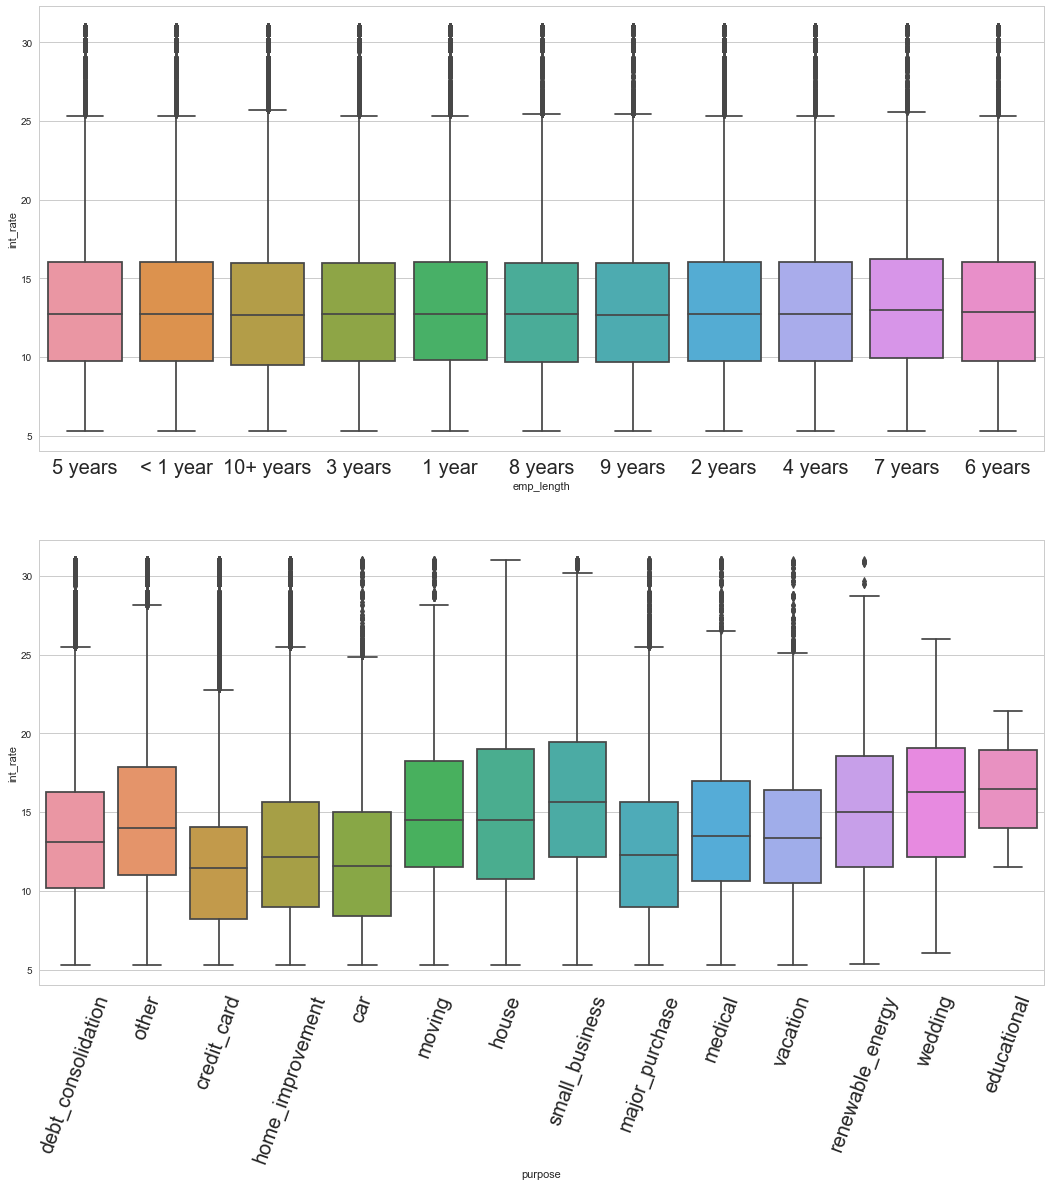

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(18,18))
plt.rcParams['font.size'] = 20
plt.rc('xtick', labelsize=20) 
sns.boxplot(x='emp_length', y='int_rate', data=df, ax=axes[0])
plt.xticks(rotation=180)
sns.boxplot(x='purpose', y='int_rate', data=df, ax=axes[1])
plt.xticks(rotation=70)

plt.show()

In [78]:
df.emp_length

AttributeError: 'DataFrame' object has no attribute 'emp_length'

KeyError: 'emp_length'

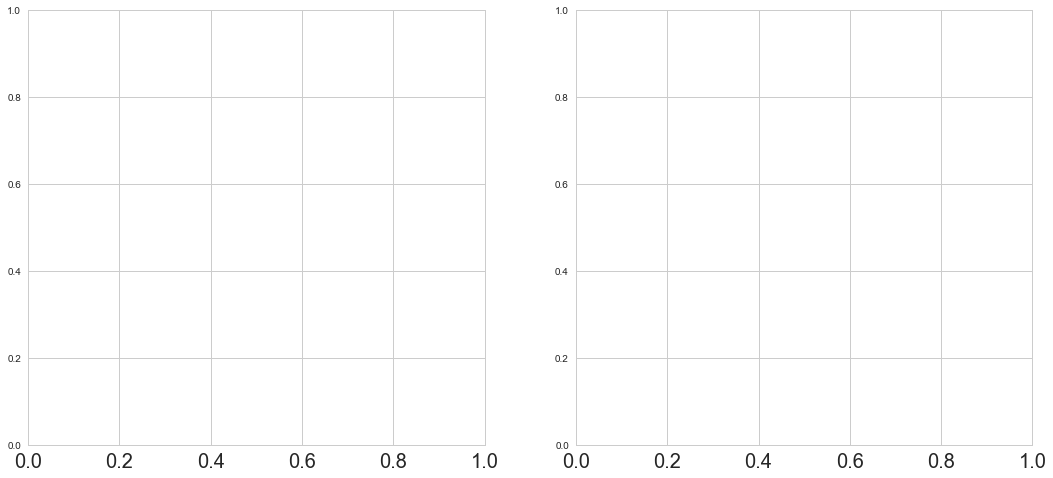

In [77]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
df.groupby('emp_length').size().plot(kind='pie',autopct='%1.2f%%',ax=axs[0])

def emp_length_class(text):
    if text=='< 1 year' or text=='1 year' or text=='2 years' or text=='3 years':
        return '<=3 years'
    elif text=='4 years' or text=='5 years' or text=='6 years':
        return '4-6 years'
    elif text=='7 years' or text=='8 years' or text=='9 years':
        return '7-9 years'
    elif text=='10+ years':
        return '>=10 years'
    else:
        return None
df['emp_length_class']=df['emp_length'].apply(emp_length_class)
df.groupby('emp_length_class').size().plot(kind='pie',autopct='%1.2f%%',ax=axs[1])

plt.show()

In [210]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=10,stratify=df['loan_status'])
train_df.to_csv('0411train_df.csv', index=False,compression="zip")
test_df.to_csv('0411test_df.csv', index=False,compression="zip")
print('train的筆數/特徵數 : {}'.format(train_df.shape))
print('test的筆數/特徵數 : {}'.format(test_df.shape))

train的筆數/特徵數 : (1288362, 47)
test的筆數/特徵數 : (322091, 47)


In [60]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\justi\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\justi\AppData\Local\Temp\tmpm6_kz2ns
  JVM stdout: C:\Users\justi\AppData\Local\Temp\tmpm6_kz2ns\h2o_justi_started_from_python.out
  JVM stderr: C:\Users\justi\AppData\Local\Temp\tmpm6_kz2ns\h2o_justi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,+08:00
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,2 months and 6 days
H2O cluster name:,H2O_from_python_justi_pcuzc1
H2O cluster total nodes:,1
H2O cluster free memory:,3.523 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [61]:
train = h2o.load_dataset('C:\\Users\justi\OneDrive\桌面\MyFuture\\0411train_df')
test = h2o.load_dataset('C:\\Users\justi\OneDrive\桌面\MyFuture\\0411test_df')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [70]:
###### Identify predictors and response
x = train.columns
y = "loan_status"
x.remove(y)


# For binary classification, response should be a factor
# make 2nd column a factor
train[y] = train[y].asfactor() 
test[y] = test[y].asfactor()

# Run AutoML 
aml = H2OAutoML(project_name='LC', 
                max_models=50,         # 50 base models
                balance_classes=True,  # Doing smart Class imbalance sampling
                max_runtime_secs=7200, # 2 hours
                seed=1234)             # Set a seed for reproducability
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
14:27:58.860: AutoML: XGBoost is not available; skipping it.
15:38:27.20: New models will be added to existing leaderboard LC@@loan_status (leaderboard frame=null) with already 6 models.
15:38:27.21: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%

17:38:29.405: StackedEnsemble_BestOfFamily_AutoML_20200412_153827 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
17:38:30.408: StackedEnsemble_AllModels_AutoML_20200412_153827 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was del

In [63]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20200412_142758,0.729033,0.441216,0.910468,0.473379,0.374877,0.140533
StackedEnsemble_BestOfFamily_AutoML_20200412_142758,0.72902,0.444049,0.909679,0.475362,0.375561,0.141046
StackedEnsemble_AllModels_AutoML_20200412_142758,0.728903,0.444044,0.909775,0.476451,0.37557,0.141053
GBM_2_AutoML_20200412_142758,0.720186,0.450669,0.90649,0.487963,0.379064,0.14369
DRF_1_AutoML_20200412_142758,0.715017,0.456497,0.904526,0.487931,0.381536,0.14557
GLM_1_AutoML_20200412_142758,0.710012,0.451794,0.901757,0.491728,0.379251,0.143831


In [64]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

AttributeError: type object 'ModelBase' has no attribute 'metalearner'

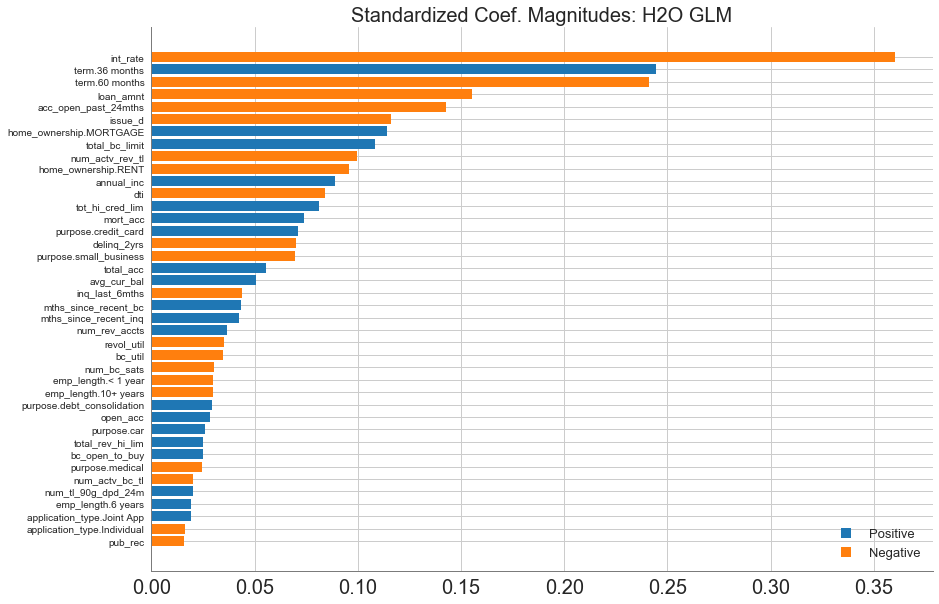

In [65]:
# Get the GLM leader from above for looking at feature importance
df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("GLM") != -1):
        glm_leader_model = m
        break
h2o.get_model(glm_leader_model).std_coef_plot(num_of_features=40)

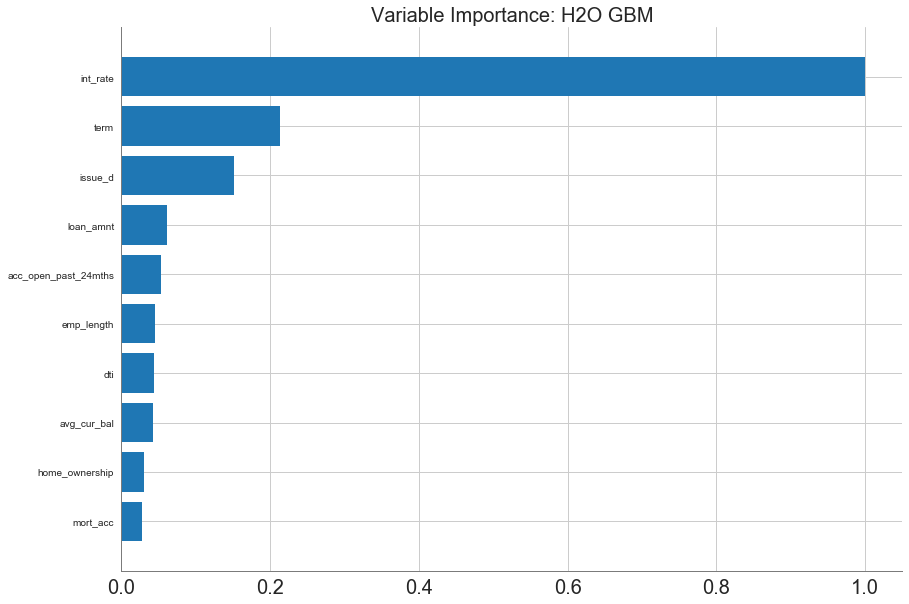

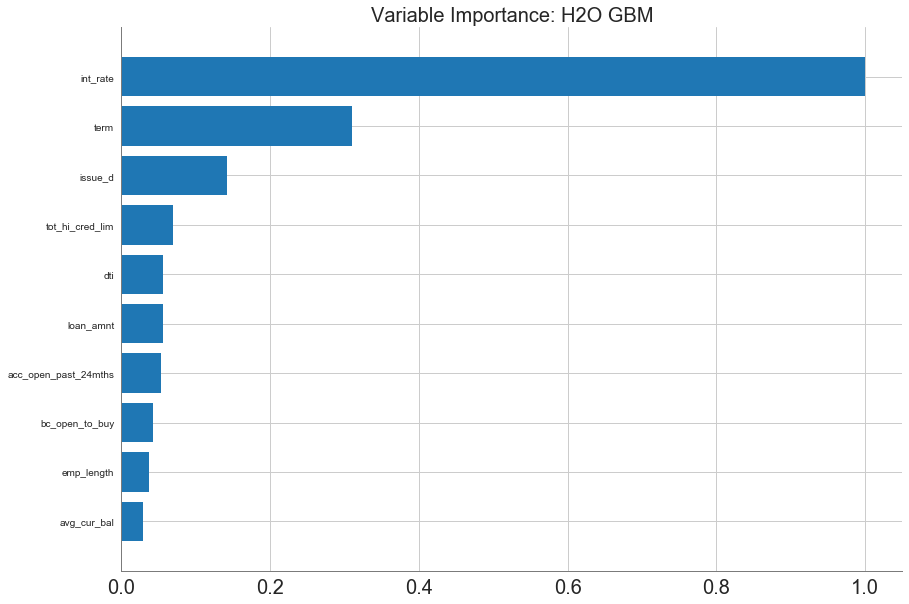

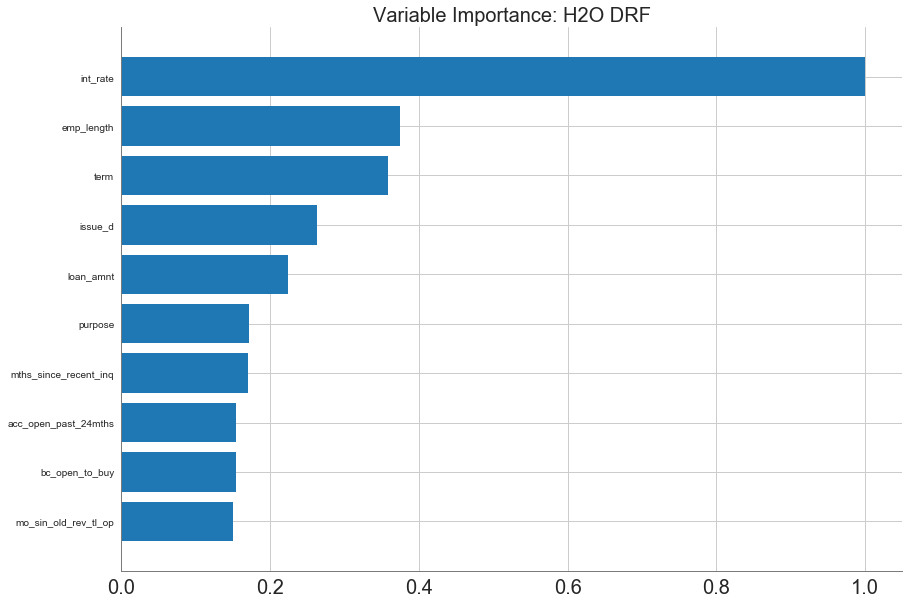

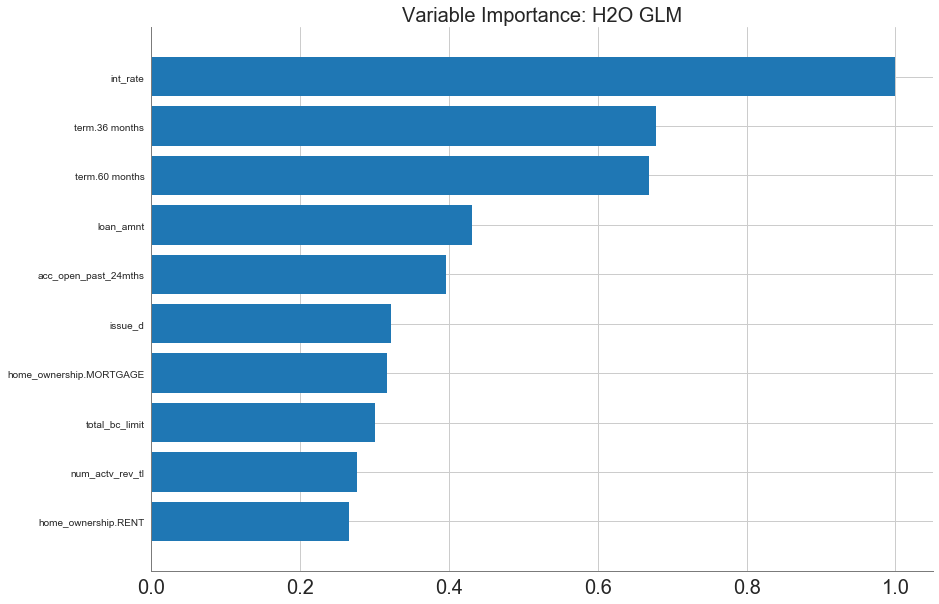

In [66]:
# Let's do variable importance for each one of the models in the LeaderBoard
# We can't do this for a StackedEnsemble, so will skip it

df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("StackedEnsemble") == -1):
        h2o.get_model(m).varimp_plot()

In [67]:
test_pc = aml.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [68]:
# These scores were predicted by the stacked ensemble leader ...
test_pc

predict,Charged Off,Fully Paid
Fully Paid,0.0847744,0.915226
Charged Off,0.506297,0.493703
Fully Paid,0.240326,0.759674
Fully Paid,0.274867,0.725133
Fully Paid,0.111913,0.888087
Charged Off,0.366505,0.633495
Fully Paid,0.0917421,0.908258
Fully Paid,0.175431,0.824569
Fully Paid,0.065702,0.934298
Fully Paid,0.202793,0.797207


In [69]:
aml.leader.model_performance(test_data=test,xval=False)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1402983563690682
RMSE: 0.3745642219554188
LogLoss: 0.44065327232451146
Mean Per-Class Error: 0.3324172341886915
AUC: 0.7301256445837243
AUCPR: 0.9109149024217215
Gini: 0.4602512891674486

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4968933372559841: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,4490.00000,58869.00000,0.9291,(58869.0/63359.0)
1,Fully Paid,2965.00000,255767.00000,0.0115,(2965.0/258732.0)
2,Total,7455.00000,314636.00000,0.192,(61834.0/322091.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.49689,0.89216,351.00000
1,max f2,0.31505,0.95332,395.00000
2,max f0point5,0.68096,0.85649,253.00000
3,max accuracy,0.52422,0.80859,339.00000
4,max precision,0.98856,1.00000,0.00000
5,max recall,0.25587,1.00000,399.00000
6,max specificity,0.98856,1.00000,0.00000
7,max absolute_mcc,0.75537,0.27507,200.00000
8,max min_per_class_accuracy,0.79675,0.66582,166.00000
9,max mean_per_class_accuracy,0.80446,0.66758,160.00000



Gains/Lift Table: Avg response rate: 80.33 %, avg score: 80.48 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01000,0.97663,1.23522,1.23522,0.99224,0.98054,0.99224,0.98054,0.01235,0.01235,23.52205,23.52205
1,,2,0.02000,0.97190,1.22556,1.23039,0.98448,0.97420,0.98836,0.97737,0.01226,0.02461,22.55583,23.03894
2,,3,0.03000,0.96803,1.21280,1.22453,0.97423,0.96995,0.98365,0.97490,0.01213,0.03674,21.28041,22.45276
3,,4,0.04000,0.96447,1.21126,1.22121,0.97299,0.96621,0.98098,0.97273,0.01211,0.04885,21.12581,22.12103
4,,5,0.05000,0.96101,1.20160,1.21729,0.96523,0.96274,0.97783,0.97073,0.01202,0.06087,20.15959,21.72874
5,,6,0.10000,0.94552,1.18822,1.20276,0.95449,0.95306,0.96616,0.96190,0.05941,0.12028,18.82234,20.27554
6,,7,0.15000,0.93177,1.17237,1.19263,0.94175,0.93862,0.95802,0.95414,0.05862,0.17890,17.23728,19.26283
7,,8,0.20000,0.91843,1.15383,1.18293,0.92686,0.92512,0.95023,0.94688,0.05769,0.23659,15.38258,18.29275
8,,9,0.30000,0.89164,1.13021,1.16535,0.90788,0.90516,0.93612,0.93297,0.11302,0.34961,13.02077,16.53544
9,,10,0.40000,0.86291,1.08966,1.14643,0.87531,0.87745,0.92092,0.91909,0.10897,0.45857,8.96637,14.64319


In [71]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20200412_153827,0.730711,0.440233,0.911242,0.474489,0.374437,0.140203
GBM_2_AutoML_20200412_153827,0.730572,0.440311,0.911307,0.473164,0.374493,0.140245
GBM_1_AutoML_20200412_153827,0.730378,0.440444,0.910993,0.47621,0.374538,0.140278
GBM_1_AutoML_20200412_142758,0.729033,0.441216,0.910468,0.473379,0.374877,0.140533
StackedEnsemble_BestOfFamily_AutoML_20200412_142758,0.72902,0.444049,0.909679,0.475362,0.375561,0.141046
StackedEnsemble_AllModels_AutoML_20200412_142758,0.728903,0.444044,0.909775,0.476451,0.37557,0.141053
GBM_4_AutoML_20200412_153827,0.728671,0.441487,0.910366,0.477491,0.374968,0.140601
GBM_2_AutoML_20200412_142758,0.720186,0.450669,0.90649,0.487963,0.379064,0.14369
GBM_5_AutoML_20200412_153827,0.715688,0.459391,0.904223,0.495805,0.382964,0.146661
DRF_1_AutoML_20200412_153827,0.715017,0.456497,0.904526,0.487931,0.381536,0.14557


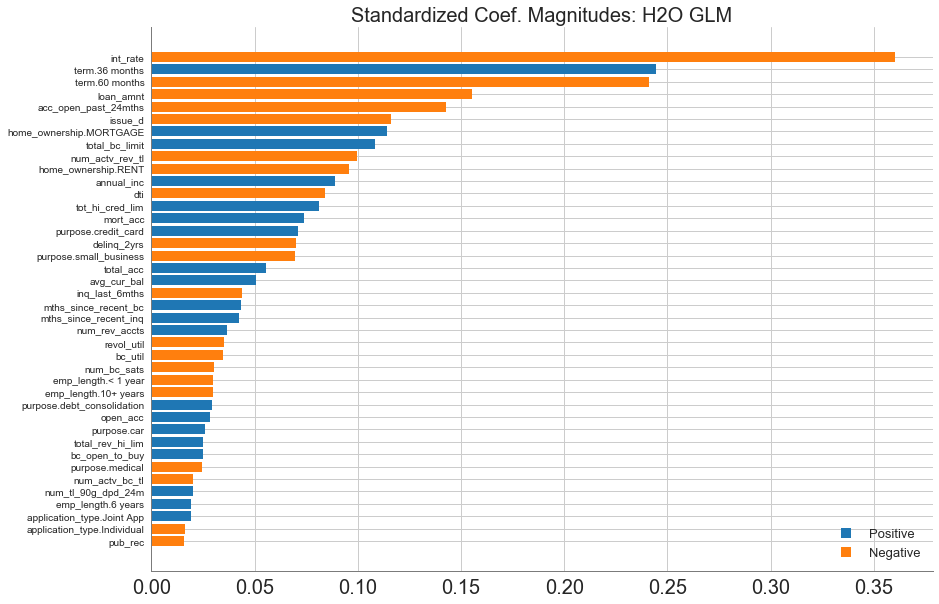

In [72]:
# Get the GLM leader from above for looking at feature importance
df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("GLM") != -1):
        glm_leader_model = m
        break
h2o.get_model(glm_leader_model).std_coef_plot(num_of_features=40)

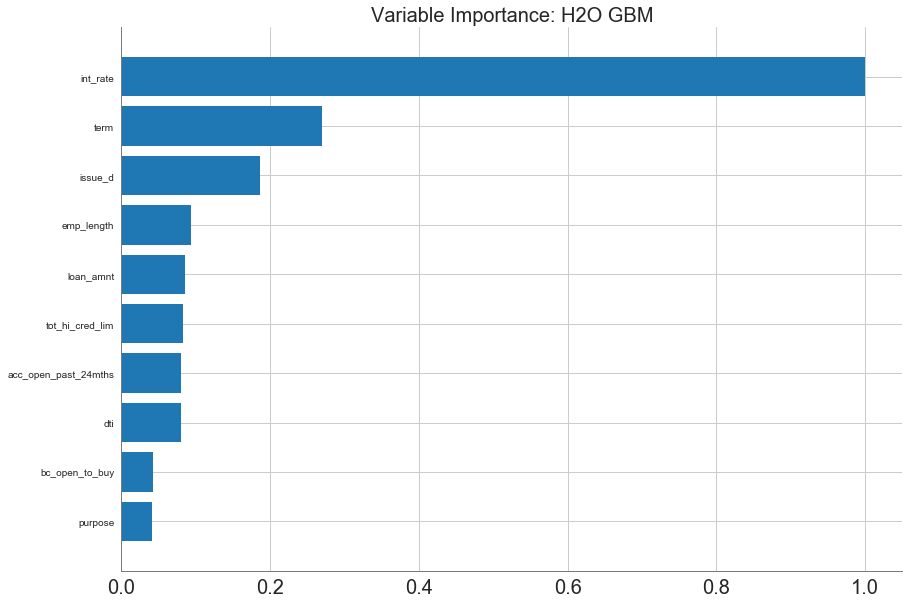

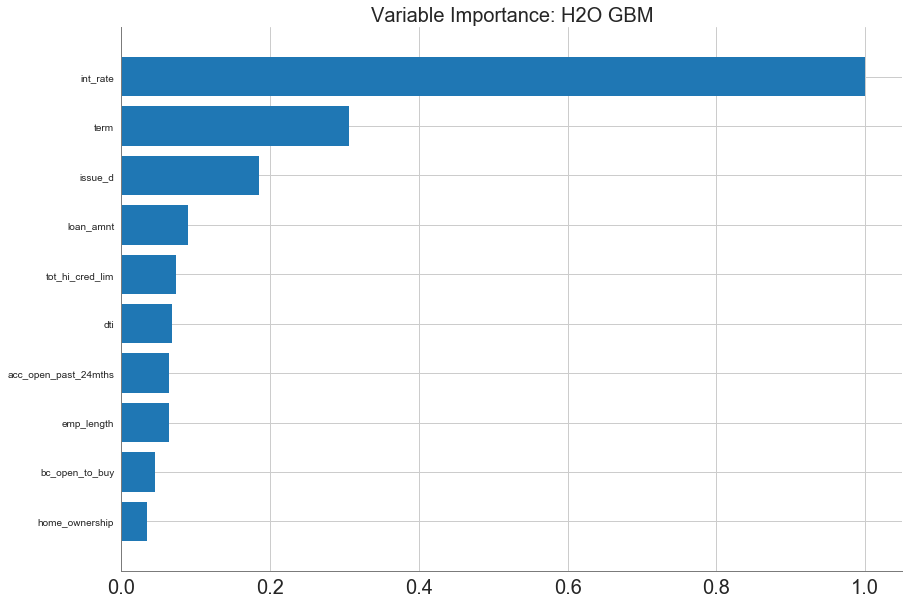

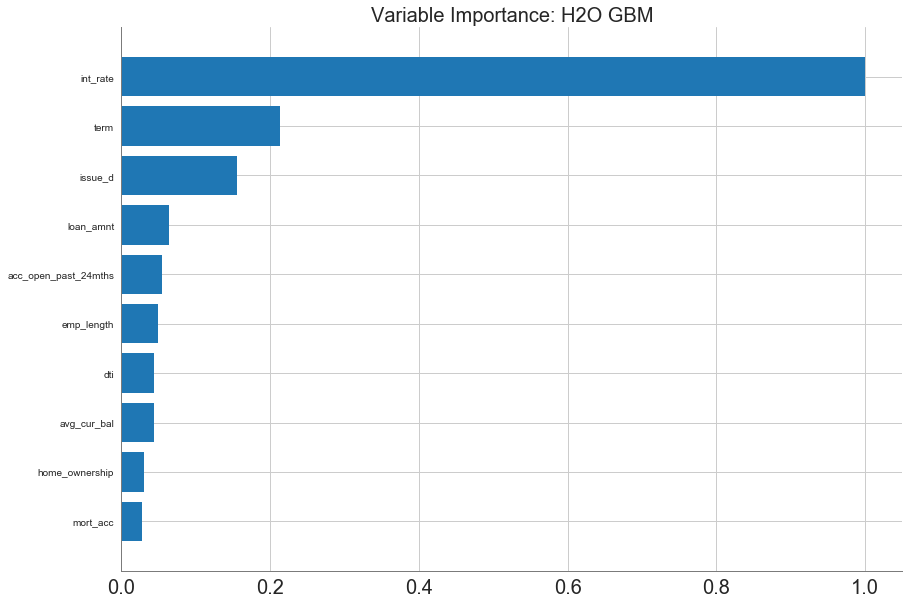

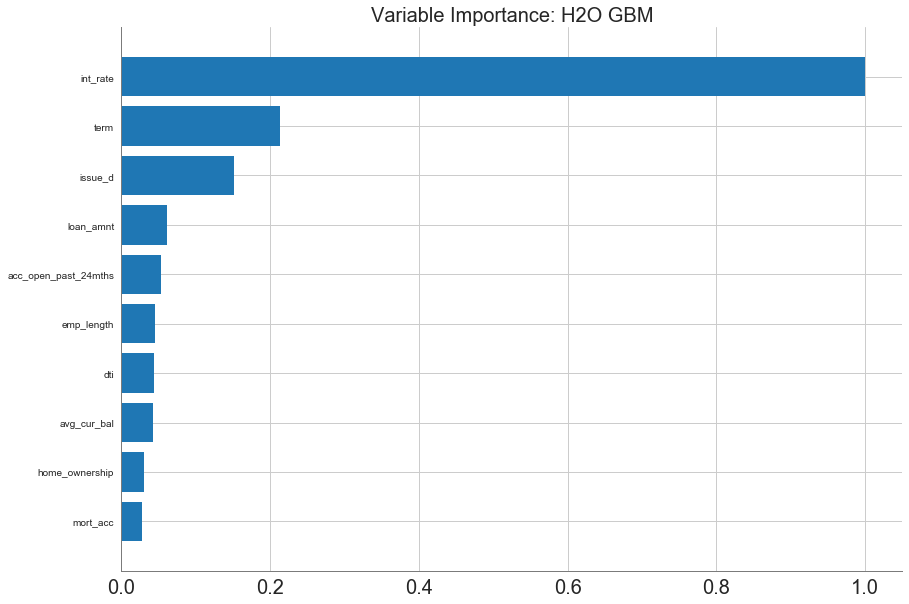

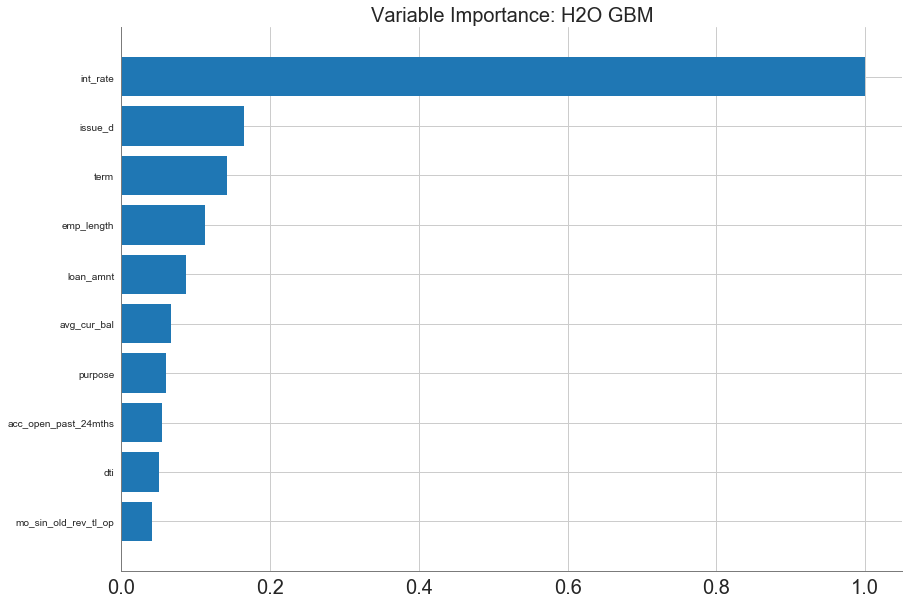

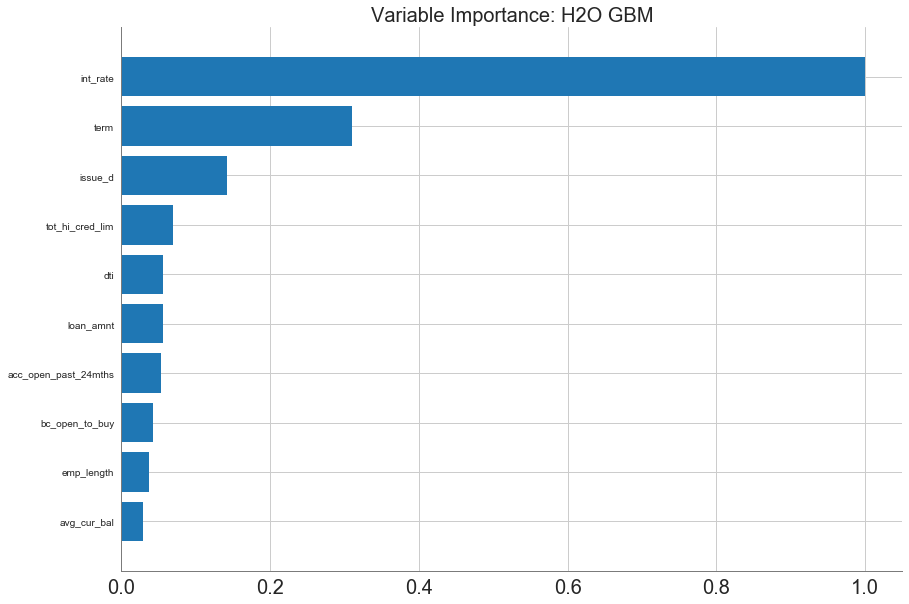

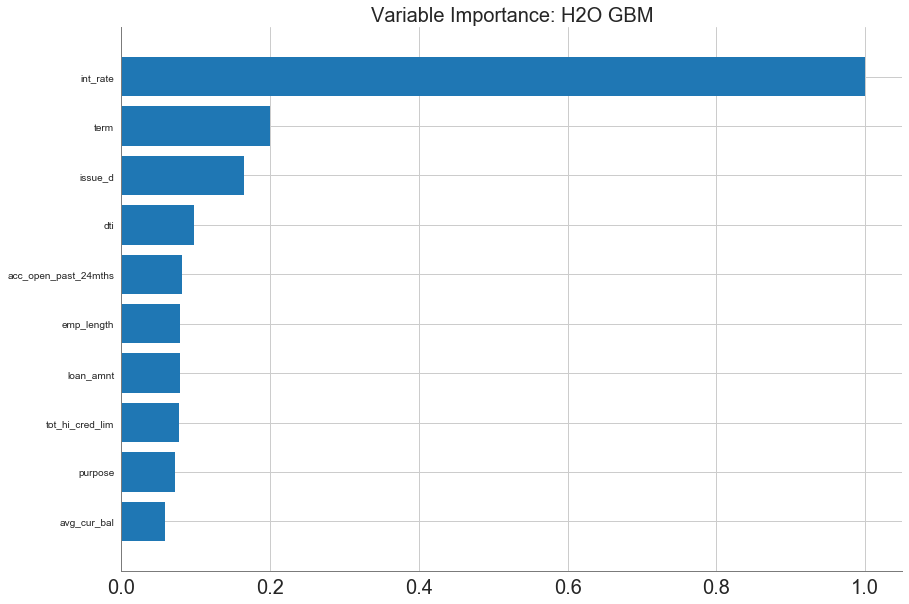

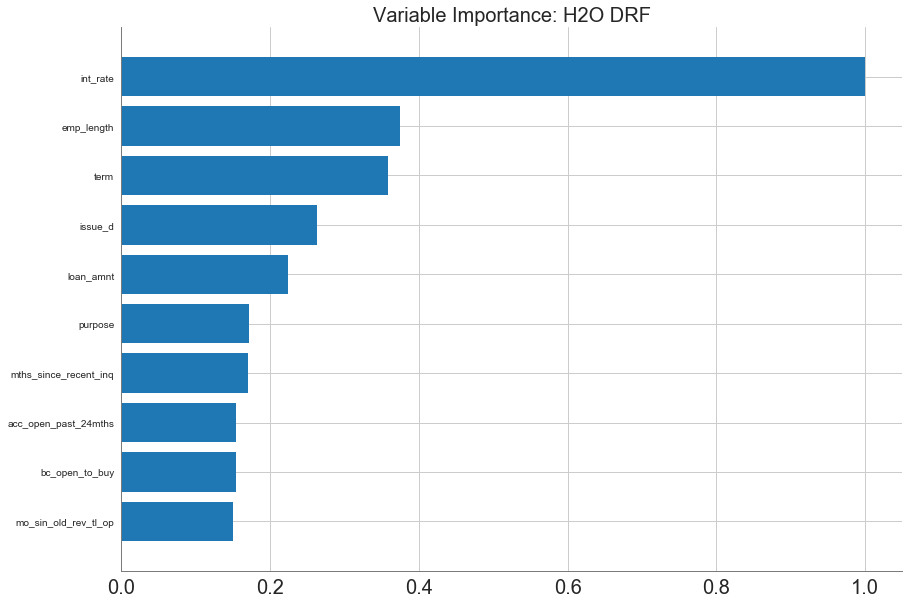

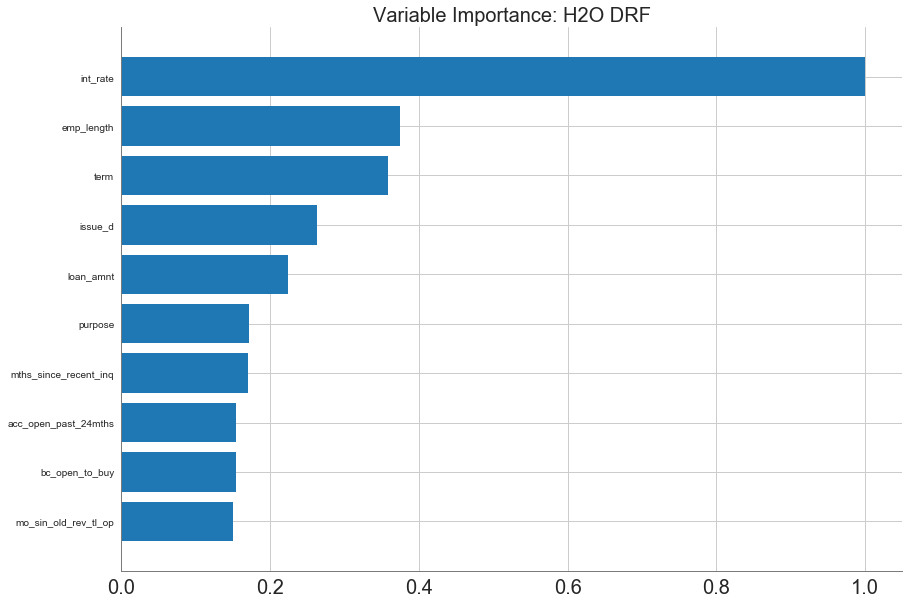

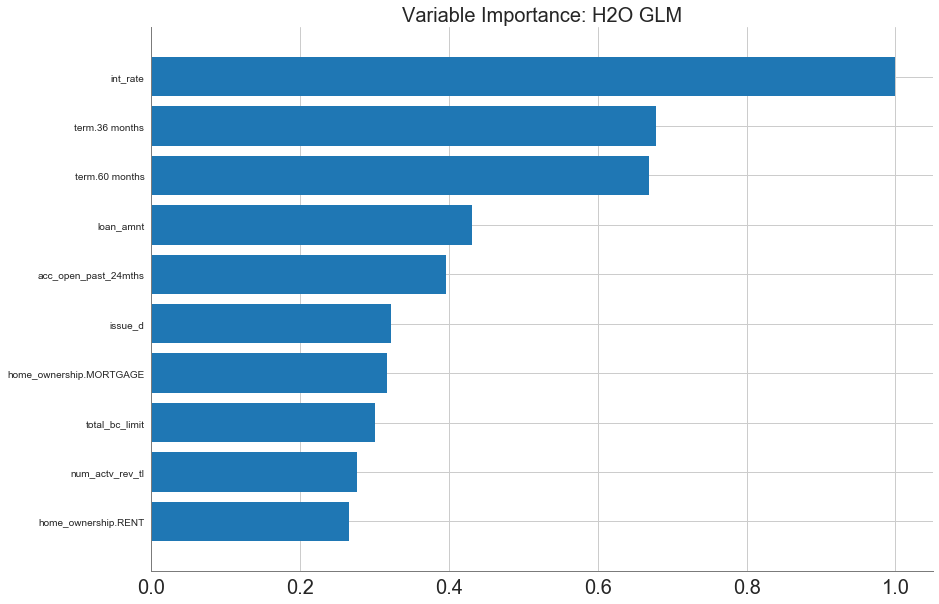

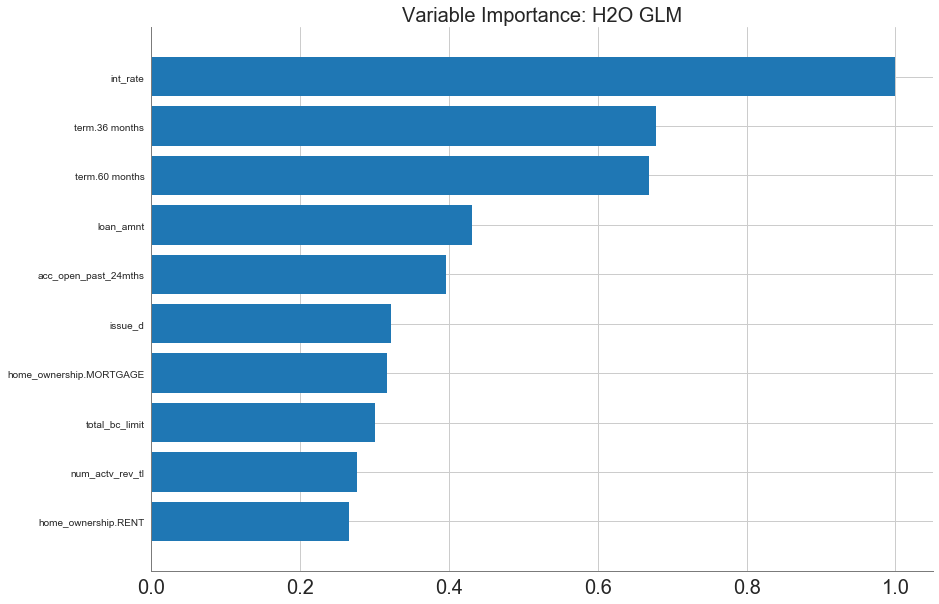

In [73]:
# Let's do variable importance for each one of the models in the LeaderBoard
# We can't do this for a StackedEnsemble, so will skip it

df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("StackedEnsemble") == -1):
        h2o.get_model(m).varimp_plot()

In [74]:
test_pc = aml.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [75]:
# These scores were predicted by the stacked ensemble leader ...
test_pc

predict,Charged Off,Fully Paid
Fully Paid,0.0800578,0.919942
Charged Off,0.380797,0.619203
Fully Paid,0.204929,0.795071
Fully Paid,0.261325,0.738675
Fully Paid,0.112497,0.887503
Charged Off,0.467282,0.532718
Fully Paid,0.0956583,0.904342
Fully Paid,0.188144,0.811856
Fully Paid,0.0777144,0.922286
Fully Paid,0.185501,0.814499


In [76]:
aml.leader.model_performance(test_data=test,xval=False)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.139954174853065
RMSE: 0.37410449723715566
LogLoss: 0.4395748182164103
Mean Per-Class Error: 0.3316004994936135
AUC: 0.7320185123021663
AUCPR: 0.9117507127753081
Gini: 0.4640370246043326

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4715864774545912: 


,,Charged Off,Fully Paid,Error,Rate
0,Charged Off,3730.00000,59629.00000,0.9411,(59629.0/63359.0)
1,Fully Paid,2304.00000,256428.00000,0.0089,(2304.0/258732.0)
2,Total,6034.00000,316057.00000,0.1923,(61933.0/322091.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.47159,0.89225,356.00000
1,max f2,0.29105,0.95332,396.00000
2,max f0point5,0.68593,0.85685,248.00000
3,max accuracy,0.52249,0.80897,336.00000
4,max precision,0.99232,1.00000,0.00000
5,max recall,0.25893,1.00000,398.00000
6,max specificity,0.99232,1.00000,0.00000
7,max absolute_mcc,0.74704,0.27790,205.00000
8,max min_per_class_accuracy,0.79938,0.66674,165.00000
9,max mean_per_class_accuracy,0.80778,0.66840,158.00000



Gains/Lift Table: Avg response rate: 80.33 %, avg score: 80.65 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01000,0.97990,1.23561,1.23561,0.99255,0.98412,0.99255,0.98412,0.01236,0.01236,23.56070,23.56070
1,,2,0.02000,0.97521,1.22401,1.22981,0.98324,0.97744,0.98789,0.98078,0.01224,0.02460,22.40123,22.98096
2,,3,0.03000,0.97126,1.21551,1.22504,0.97640,0.97323,0.98406,0.97826,0.01216,0.03675,21.55095,22.50429
3,,4,0.04000,0.96764,1.21512,1.22256,0.97609,0.96941,0.98207,0.97605,0.01215,0.04890,21.51230,22.25630
4,,5,0.05000,0.96426,1.21010,1.22007,0.97206,0.96593,0.98007,0.97403,0.01210,0.06101,21.00987,22.00701
5,,6,0.10000,0.94893,1.18861,1.20434,0.95480,0.95643,0.96743,0.96523,0.05943,0.12044,18.86099,20.43400
6,,7,0.15000,0.93511,1.17175,1.19348,0.94126,0.94198,0.95871,0.95748,0.05859,0.17902,17.17544,19.34786
7,,8,0.20000,0.92194,1.15568,1.18403,0.92835,0.92854,0.95112,0.95024,0.05779,0.23681,15.56810,18.40290
8,,9,0.30000,0.89533,1.13268,1.16691,0.90987,0.90872,0.93737,0.93640,0.11327,0.35008,13.26813,16.69133
9,,10,0.40000,0.86695,1.08897,1.14743,0.87476,0.88133,0.92172,0.92264,0.10890,0.45897,8.89680,14.74271
